# Pulsar Analysis - Gravitational Wave Background Project

- Most of these applications rely on a single, simple technique, `pulsar timing`.This technique achieves its full power for recycled pulsars. Put simply, this consists of the study of the times of arrival (`TOAs`) of the pulses (normally determined by adding many individual pulses coherently in phase) at one or several telescopes, most often radio telescopes.
- In order to correct for the movement of the radio telescope relative to the SSB (Solar system barycentre), we need to have an estimate of the position of the pulsar in the sky; i.e. the **_right ascension_** (α), **_declination_** (δ) and, for measurements spanning many years, the proper motion in these two coordinates (μα, μδ).

> Please check for documentation created by CERN: [Project Document](https://indico.cern.ch/event/783425/contributions/3359109/attachments/1816111/2968248/PINT__PyGamma19_.pdf)

> Please check for other documentation: [Documentation for PINT](https://scholarworks.utrgv.edu/cgi/viewcontent.cgi?article=1451&context=pa_fac)

> Please check for simple operations: [Simple Operations](https://pint.readthedocs.io/_/downloads/en/0.9/pdf/)

# Libraries

In [2]:
%%capture
!pip install pint-pulsar
!pip install astropy

## Packages

In [16]:
import astropy
import astropy.units as astunit
import matplotlib
import matplotlib.pyplot as plt
import pint.logging
import pint.fitter
import pint.config
from pint.models import get_model_and_toas,get_model
from pint.residuals import Residuals
from pint.toa import get_TOAs

## Configurations

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use('dark_background')

In [77]:
matplotlib.rcParams["figure.figsize"] = (10,8)
matplotlib.rcParams["figure.labelsize"] = "medium"
matplotlib.rcParams["font.size"] = 9.0
matplotlib.rcParams["lines.linewidth"] = 2

In [ ]:
%%capture
pint.logging.setup(level="INFO")

# Data

## Path

> Please check: [More Pulsar Data](https://github.com/nanograv/PINT/tree/master/src/pint/data/examples)

In [14]:
par_ = pint.config.examplefile("NGC6440E.par")
tim_ = pint.config.examplefile("NGC6440E.tim")

## Reading

### Single - PAR File

- `Parameter` files are text files, consisting of a collection of lines whose order is irrelevant. Lines generally begin with an all-uppercase parameter name, then a space-separated list of values whose interpretation depends on the parameter.

In [17]:
single_par = get_model(par_)

In [29]:
print(f"PARAMETERS:\n\n{single_par.params}")

PARAMETERS:

['PSR', 'TRACK', 'EPHEM', 'CLOCK', 'UNITS', 'START', 'FINISH', 'RM', 'INFO', 'TIMEEPH', 'T2CMETHOD', 'BINARY', 'DILATEFREQ', 'DMDATA', 'NTOA', 'CHI2', 'POSEPOCH', 'PX', 'RAJ', 'DECJ', 'PMRA', 'PMDEC', 'CORRECT_TROPOSPHERE', 'PLANET_SHAPIRO', 'NE_SW', 'SWP', 'SWM', 'DM', 'DM1', 'DMEPOCH', 'TZRMJD', 'TZRSITE', 'TZRFRQ', 'F0', 'PEPOCH', 'F1']


#### Parameters

In [53]:
def ReadParametersForPAR(par_reading):
  par_params = par_reading.params
  if len(par_params) > 0 and isinstance(par_params,list):
    for prm_ in par_params:
      att_ = getattr(single_par,prm_)
      print("###"*15)
      print(f"NAME:         {att_.name}")
      print(f"TYPE:         {type(att_)}")
      print(f"QUANTITY:     {att_.quantity},{type(att_.quantity)}")
      print(f"VALUE:        {att_.value}")
      print(f"UNIT:         {att_.units}")
      print("###"*15)
      print(f"SUMMARY:      {att_}\n\n")

In [99]:
ReadParametersForPAR(par_reading=single_par)

#############################################
NAME:         PSR
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     1748-2021E,<class 'str'>
VALUE:        1748-2021E
UNIT:         None
#############################################
SUMMARY:      strParameter(   PSR                 1748-2021E        frozen=True)


#############################################
NAME:         TRACK
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     None,<class 'NoneType'>
VALUE:        None
UNIT:         None
#############################################
SUMMARY:      strParameter(   TRACK               UNSET


#############################################
NAME:         EPHEM
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     DE421,<class 'str'>
VALUE:        DE421
UNIT:         None
#############################################
SUMMARY:      strParameter(   EPHEM               DE421             frozen=True)


#################################

### Single - TIM File / Times of Arrival (TOAs)

-  These are collections of lines, but in some cases they can contain structure in the form of blocks that are meant to be omitted from reading or have their `time` adjusted.

#### Configurations

In [43]:
single_tim = get_TOAs(tim_)

INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory.global_clock_corrections): File index.txt to be downloaded due to download policy if_expired: https://raw.githubusercontent.com/ipta/pulsar-clock-corrections/main/index.txt
INFO     (pint.observatory.global_clock_corrections): File T2runtime/clock/gps2utc.clk to be downloaded due to download policy if_missing: https://raw.githubusercontent.com/ipta/pulsar-clock-corrections/main/T2runtime/clock/gps2utc.clk
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False
INFO     (pint.observatory              ): Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
INFO     (pint.observatory              ): Loading BIPM clock version bipm2021
INFO     (pint.observatory.global_clock_corrections): File T2runtime/clock/tai2tt_bipm2021.clk 

In [46]:
print(single_tim)

62 TOAs starting at MJD 53478.28587141954


In [44]:
single_tim_model = get_TOAs(tim_,model=single_par)

INFO     (pint.observatory              ): Applying TT(TAI) to TT(BIPM2019) clock correction (~27 us)
INFO     (pint.observatory              ): Loading BIPM clock version bipm2019
INFO     (pint.observatory.global_clock_corrections): File T2runtime/clock/tai2tt_bipm2019.clk to be downloaded due to download policy if_missing: https://raw.githubusercontent.com/ipta/pulsar-clock-corrections/main/T2runtime/clock/tai2tt_bipm2019.clk
INFO     (pint.observatory              ): Using global clock file for tai2tt_bipm2019.clk with bogus_last_correction=False


In [47]:
print(single_tim_model)

62 TOAs starting at MJD 53478.28587141954


#### General Informations

In [63]:
print(f"TABLE:\n\n{single_tim.table}")

TABLE:

index        mjd        ...                obs_sun_pos                
                        ...                     km                    
----- ----------------- ... ------------------------------------------
    0 53478.28587141954 ...   132300219.00570384 .. 28301415.359200373
    1 53483.27670518884 ...    125950526.54720826 .. 32709720.94995422
    2 53489.46838978825 ...   116811489.08005221 .. 37847344.145764045
    3 53679.87564592083 ...  -107617035.22785984 .. -40589908.43799996
    4 53679.87564536537 ...  -107617036.21815397 .. -40589908.02744384
    5  53679.8756449276 ...  -107617036.99860592 .. -40589907.70388409
    6 53679.87564457819 ... -107617037.62154312 .. -40589907.445626795
    7 53679.87564513386 ...  -107617036.63088569 .. -40589907.85633354
    8 53681.70075099914 ...  -104248039.63195954 .. -41917934.22431617
    9 53681.95454490266 ...  -103778953.69813989 .. -42099238.00618052
  ...               ... ...                                        ..

In [64]:
print(f"COLUMN NAMES:\n\n{single_tim.table.colnames}")

COLUMN NAMES:

['index', 'mjd', 'mjd_float', 'error', 'freq', 'obs', 'flags', 'delta_pulse_number', 'tdb', 'tdbld', 'ssb_obs_pos', 'ssb_obs_vel', 'obs_sun_pos']


#### Parameters

In [66]:
#units of days - Julian date
print(f"MJDS:\n\n{single_tim_model.get_mjds()}")

MJDS:

[53478.28587142 53483.27670519 53489.46838979 53679.87564592
 53679.87564537 53679.87564493 53679.87564458 53679.87564513
 53681.700751   53681.9545449  53683.73678777 53685.73745904
 53687.68639838 53687.95032739 53690.8505221  53695.69557327
 53695.85890789 53700.71983242 53700.86649642 53709.63751695
 53709.80961233 53740.56747467 53740.77459869 53801.3860512
 53801.59143301 53833.2978103  53833.50245772 53843.33207938
 53865.18476778 53865.37595138 53895.11283426 53895.3234694
 53920.05274172 53920.23971474 53954.97216082 53955.17456176
 53980.90304181 53981.11981343 54010.82143311 54011.03176787
 54050.70474316 54050.94624708 54093.65660523 54095.65330737
 54098.6648706  54099.70978479 54148.68651943 54150.42513338
 54151.52682219 54152.71744732 54153.54858413 54160.52286339
 54187.33158349 54187.58732417 54099.70978574 54099.70978543
 54099.70978515 54099.7097849  54099.70978469 54099.70978449
 54099.70978432 54099.70978416] d


In [101]:
print(f"PULSE NUMBER:\n\n{single_tim_model['delta_pulse_number']}")

PULSE NUMBER:

delta_pulse_number
------------------
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               ...
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
               0.0
Length = 62 rows


In [100]:
print(f"FREQUENCY:\n\n{single_tim_model['freq']}")

FREQUENCY:

  freq  
  MHz   
--------
1949.609
1949.609
1949.609
1724.609
1874.609
2024.609
2174.609
1949.609
1949.609
1949.609
     ...
1949.609
1949.609
1687.109
1762.109
1837.109
1912.109
1987.109
2062.109
2137.109
2212.109
Length = 62 rows


In [69]:
print(f"SUN POSITION:\n\n{single_tim_model['obs_sun_pos']}")

SUN POSITION:

               obs_sun_pos                
                    km                    
------------------------------------------
  132300219.00570384 .. 28301415.359200373
   125950526.54720826 .. 32709720.94995422
  116811489.08005221 .. 37847344.145764045
 -107617035.22785984 .. -40589908.43799996
 -107617036.21815397 .. -40589908.02744384
 -107617036.99860592 .. -40589907.70388409
-107617037.62154312 .. -40589907.445626795
 -107617036.63088569 .. -40589907.85633354
 -104248039.63195954 .. -41917934.22431617
 -103778953.69813989 .. -42099238.00618052
                                       ...
    148137668.80068263 .. 7406553.86137678
     148057390.624038 .. 7667155.828443215
  22419253.281310633 .. -57831702.95571323
  22419252.476043273 .. -57831703.00623521
   22419251.76717777 .. -57831703.05070901
  22419251.14204362 .. -57831703.089929536
   22419250.58466372 .. -57831703.12489923
     22419250.090728 .. -57831703.15588845
    22419249.64046944 .. -57831703.1841

In [50]:
print(f"SUMMARY:\n\n{single_tim_model.get_summary()}")

SUMMARY:

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  22.1 us



### Single - Both

#### Configuration

In [57]:
pfile_,tf_ = get_model_and_toas(par_,tim_)

In [102]:
ReadParametersForPAR(par_reading=pfile_)

#############################################
NAME:         PSR
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     1748-2021E,<class 'str'>
VALUE:        1748-2021E
UNIT:         None
#############################################
SUMMARY:      strParameter(   PSR                 1748-2021E        frozen=True)


#############################################
NAME:         TRACK
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     None,<class 'NoneType'>
VALUE:        None
UNIT:         None
#############################################
SUMMARY:      strParameter(   TRACK               UNSET


#############################################
NAME:         EPHEM
TYPE:         <class 'pint.models.parameter.strParameter'>
QUANTITY:     DE421,<class 'str'>
VALUE:        DE421
UNIT:         None
#############################################
SUMMARY:      strParameter(   EPHEM               DE421             frozen=True)


#################################

#### Summary

In [59]:
print(f"SUMMARY:\n\n{tf_.print_summary()}")

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  22.1 us

SUMMARY:

None


# Plotting - Residuals

## Informations

In [73]:
rs_ = Residuals(tf_,pfile_).phase_resids #turns
sc_ = Residuals(tf_,pfile_).time_resids #second
xt_ = tf_.get_mjds()

In [72]:
print(f"RESIDS:\n\n{rs_}") #Residuals in phase units

RESIDS:

[ 0.09808071  0.09316281  0.08403002 -0.06750549 -0.06797528 -0.07429986
 -0.07443214 -0.07131785 -0.06825554 -0.06508237 -0.06555115 -0.06306055
 -0.05999685 -0.05895801 -0.05366616 -0.04584715 -0.04569341 -0.03597094
 -0.03793269 -0.02479816 -0.02204758  0.03451573  0.03364936  0.10046244
  0.10264347  0.09609952  0.09181971  0.08504262  0.05829965  0.0603302
  0.00815942  0.00656392 -0.03770268 -0.03686243 -0.0886213  -0.08991913
 -0.11070943 -0.11184475 -0.11469835 -0.11148552 -0.07302035 -0.07544215
  0.0013155   0.00406183  0.00896924  0.01020915  0.07936608  0.0814908
  0.08876675  0.10145994  0.08557693  0.08440833  0.08702677  0.08896505
  0.0169523   0.01361027  0.01026235  0.01139018  0.00888725  0.0144351
  0.00399735  0.0098685 ]


In [74]:
print(f"SECONDS:\n\n{sc_}") #Residuals in time units

SECONDS:

[ 1.59518501e-03  1.51520029e-03  1.36666461e-03 -1.09790951e-03
 -1.10555017e-03 -1.20841317e-03 -1.21056451e-03 -1.15991376e-03
 -1.11010838e-03 -1.05849996e-03 -1.06612405e-03 -1.02561705e-03
 -9.75788958e-04 -9.58893306e-04 -8.72826639e-04 -7.45658155e-04
 -7.43157705e-04 -5.85031476e-04 -6.16937382e-04 -4.03317421e-04
 -3.58581901e-04  5.61363901e-04  5.47273271e-04  1.63392147e-03
  1.66939372e-03  1.56296291e-03  1.49335605e-03  1.38313343e-03
  9.48185691e-04  9.81210559e-04  1.32704788e-04  1.06755651e-04
 -6.13196472e-04 -5.99530690e-04 -1.44133716e-03 -1.46244506e-03
 -1.80057859e-03 -1.81904339e-03 -1.86545443e-03 -1.81320083e-03
 -1.18760326e-03 -1.22699136e-03  2.13953553e-05  6.60615981e-05
  1.45875799e-04  1.66041691e-04  1.29081019e-03  1.32536667e-03
  1.44370275e-03  1.65014473e-03  1.39182352e-03  1.37281739e-03
  1.41540374e-03  1.44692784e-03  2.75712193e-04  2.21357521e-04
  1.66906956e-04  1.85249930e-04  1.44542270e-04  2.34772548e-04
  6.50129273e-0

## Plot

### General

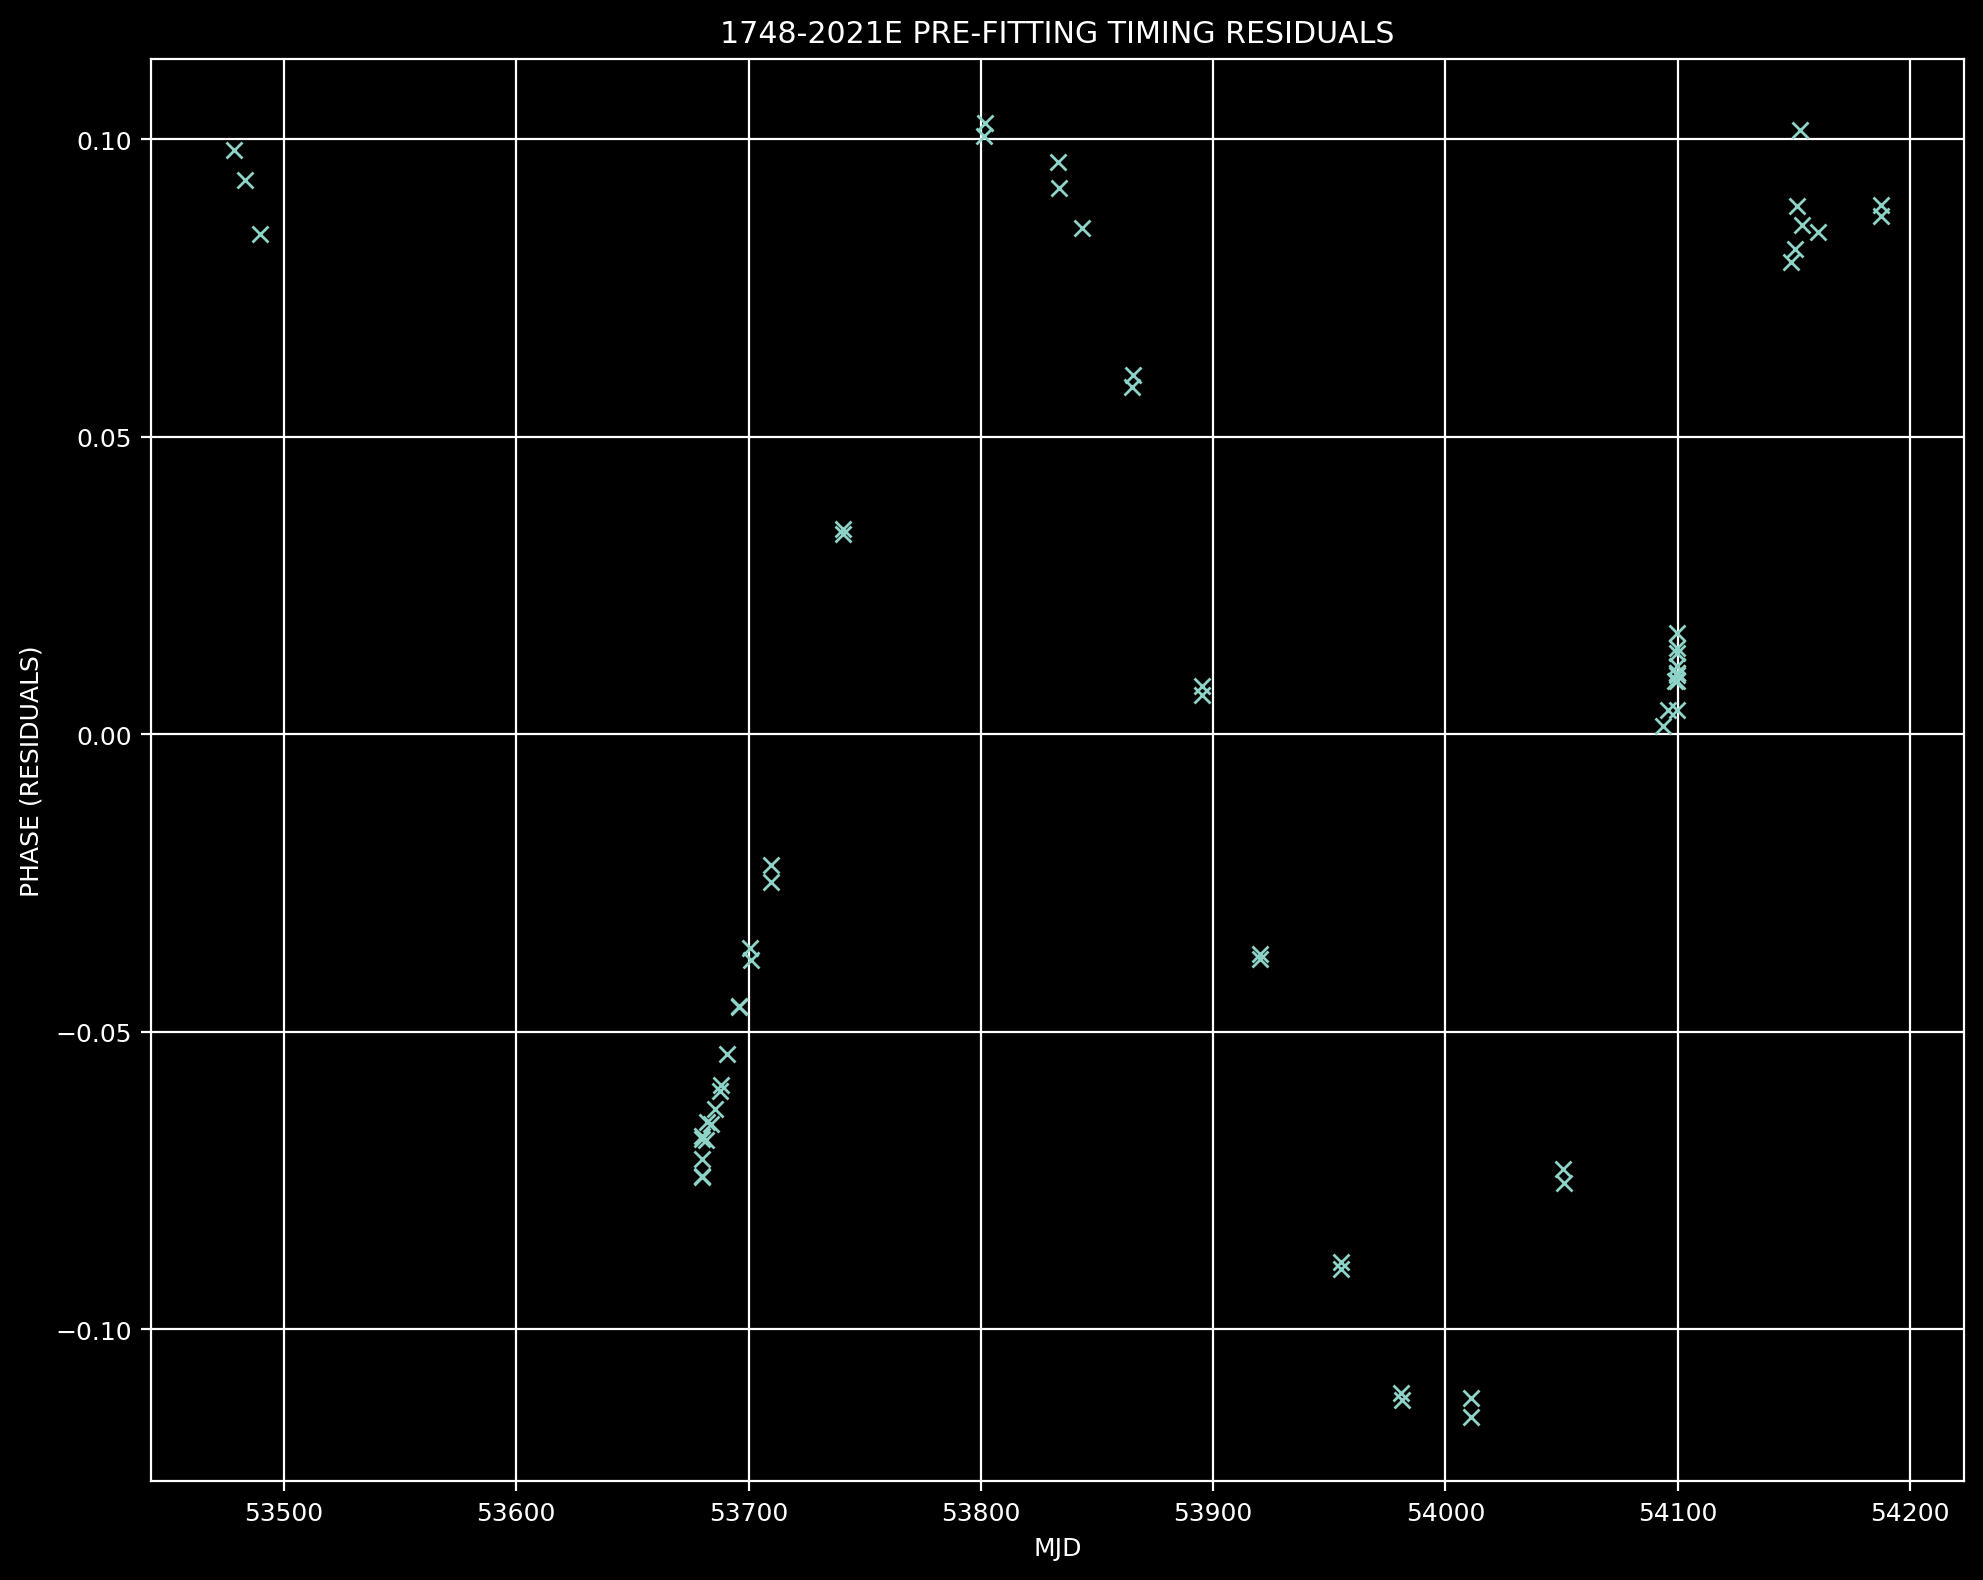

In [78]:
plt.figure()
plt.title(f"{pfile_.PSR.value} PRE-FITTING TIMING RESIDUALS")
plt.xlabel("MJD")
plt.ylabel("PHASE (RESIDUALS)")
plt.plot(xt_,rs_,"x")
plt.tight_layout()
plt.grid()
plt.show()

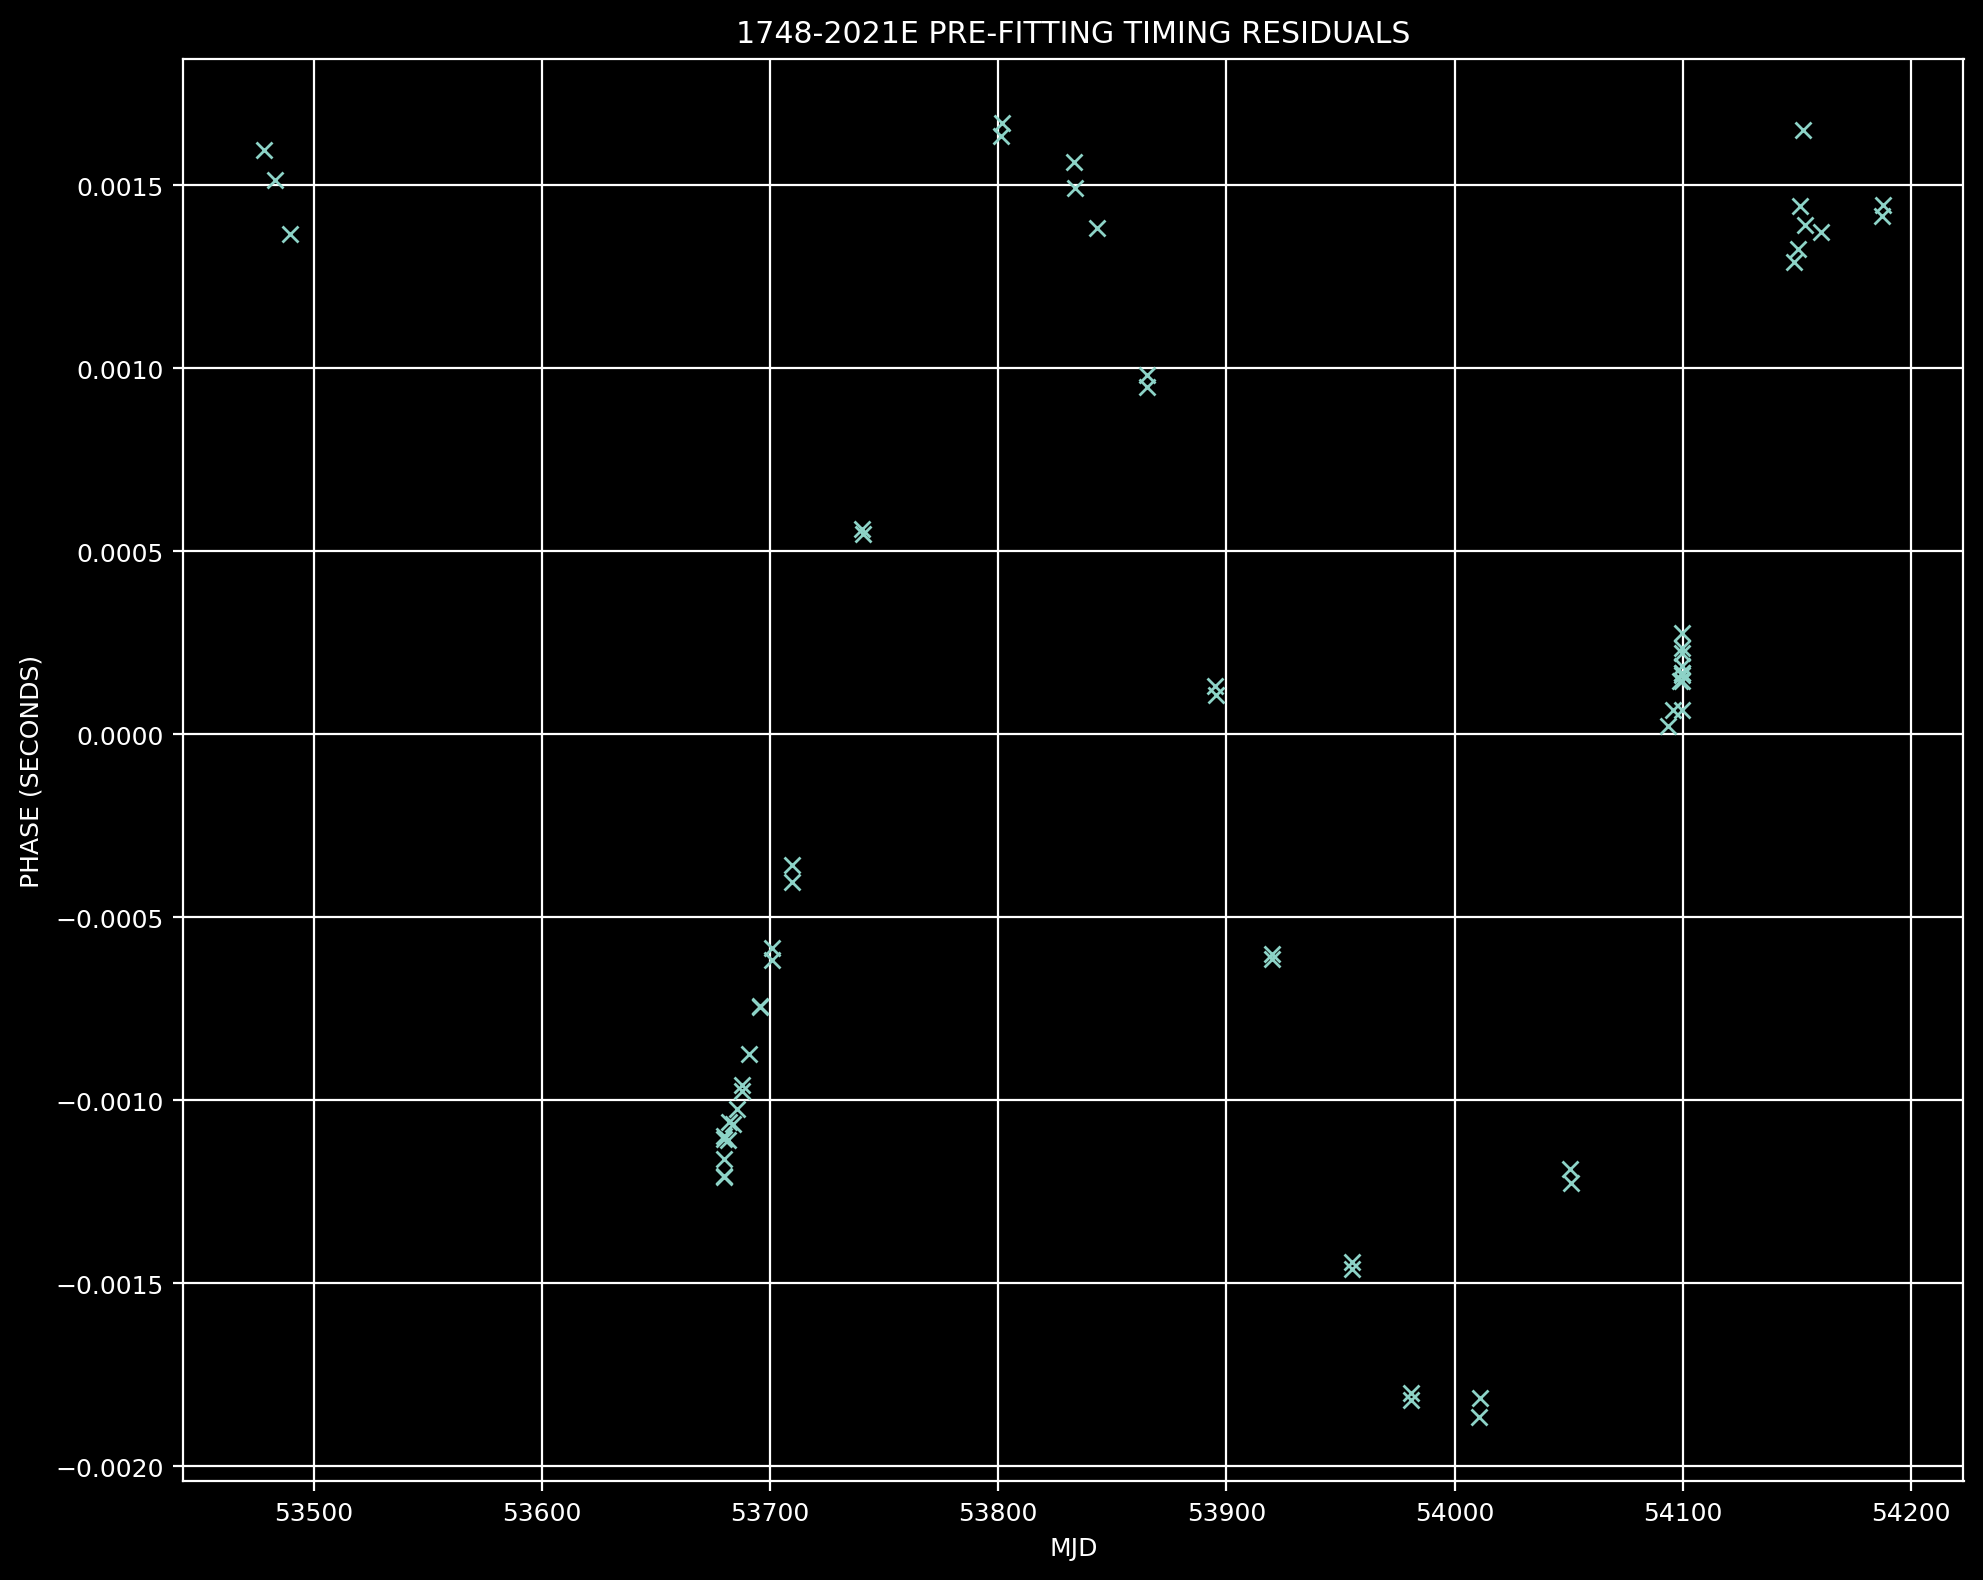

In [79]:
plt.figure()
plt.title(f"{pfile_.PSR.value} PRE-FITTING TIMING RESIDUALS")
plt.xlabel("MJD")
plt.ylabel("PHASE (SECONDS)")
plt.plot(xt_,sc_,"x")
plt.tight_layout()
plt.grid()
plt.show()

### Fitting - Errors

#### Configuration

In [80]:
error_correct = tf_.table["error"] <= 30 * astunit.us

In [81]:
tf_error_correct = tf_[error_correct]

In [82]:
tf_error_correct.print_summary()

Number of TOAs:  44
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (44):
  Min freq:      1724.609 MHz
  Max freq:      1949.609 MHz
  Min error:     13.2 us
  Max error:     29.9 us
  Median error:  21.5 us



#### Display

In [85]:
rs_error_correct = Residuals(tf_error_correct,pfile_).phase_resids #turns
xt_error_correct = tf_error_correct.get_mjds()

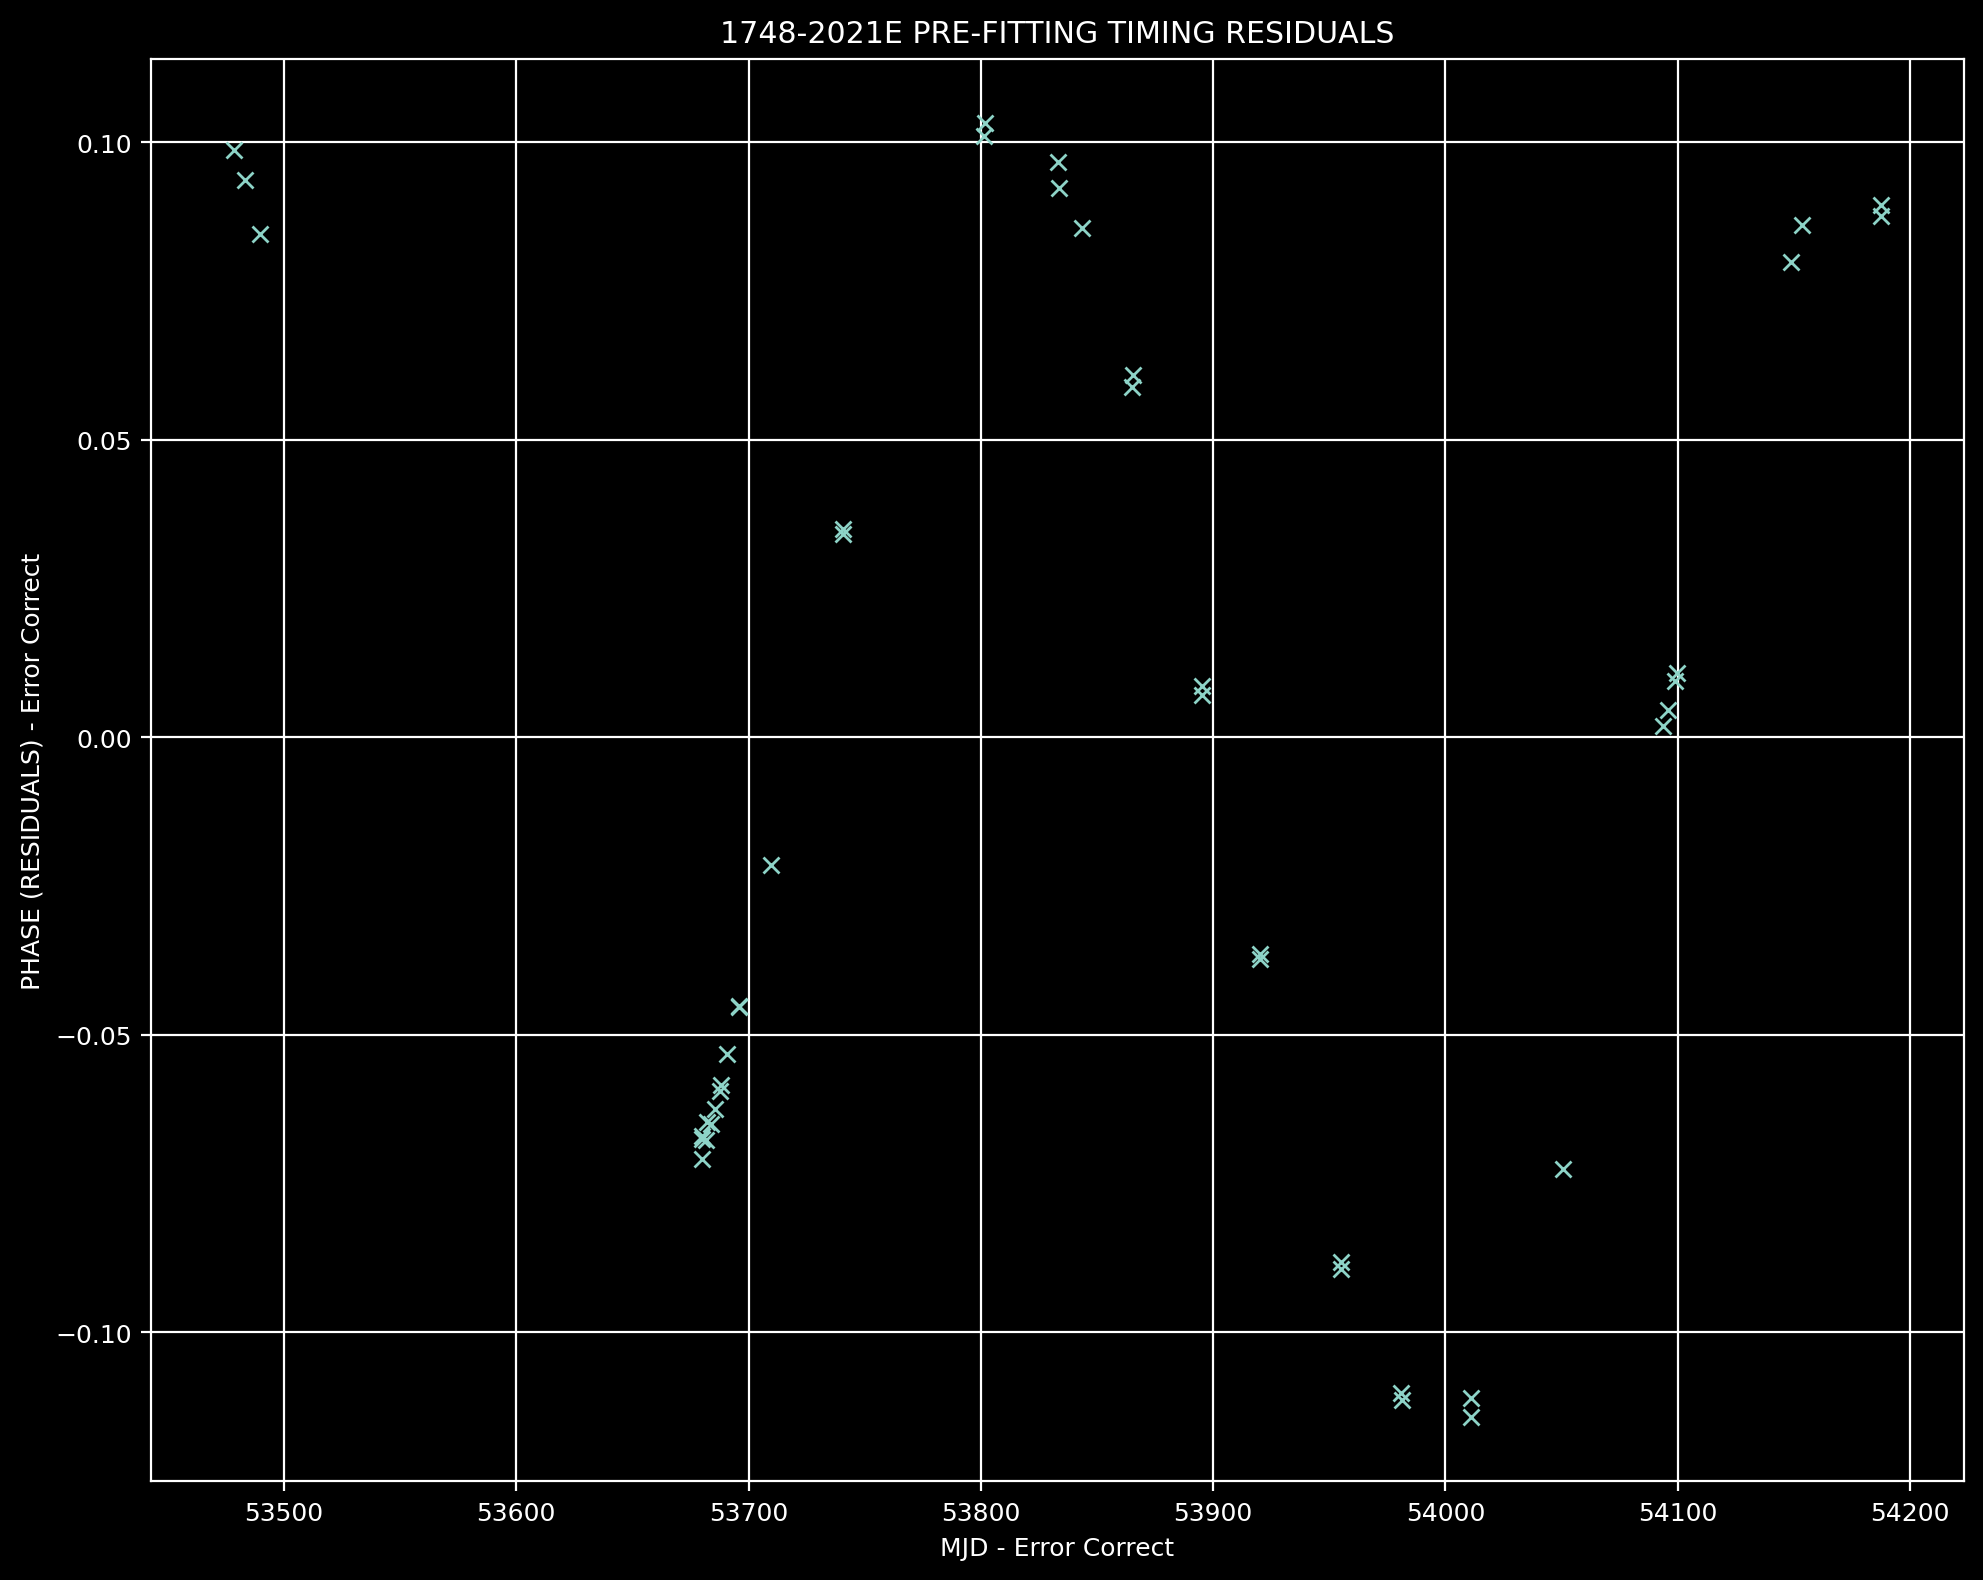

In [86]:
plt.figure()
plt.title(f"{pfile_.PSR.value} PRE-FITTING TIMING RESIDUALS")
plt.xlabel("MJD - Error Correct")
plt.ylabel("PHASE (RESIDUALS) - Error Correct")
plt.plot(xt_error_correct,rs_error_correct,"x")
plt.tight_layout()
plt.grid()
plt.show()

### Frequency

In [103]:
mjds_ = single_tim_model.get_mjds() #units of days - Julian date
freq_ = single_tim_model["freq"] #Hz
assert len(mjds_) == len(freq_)

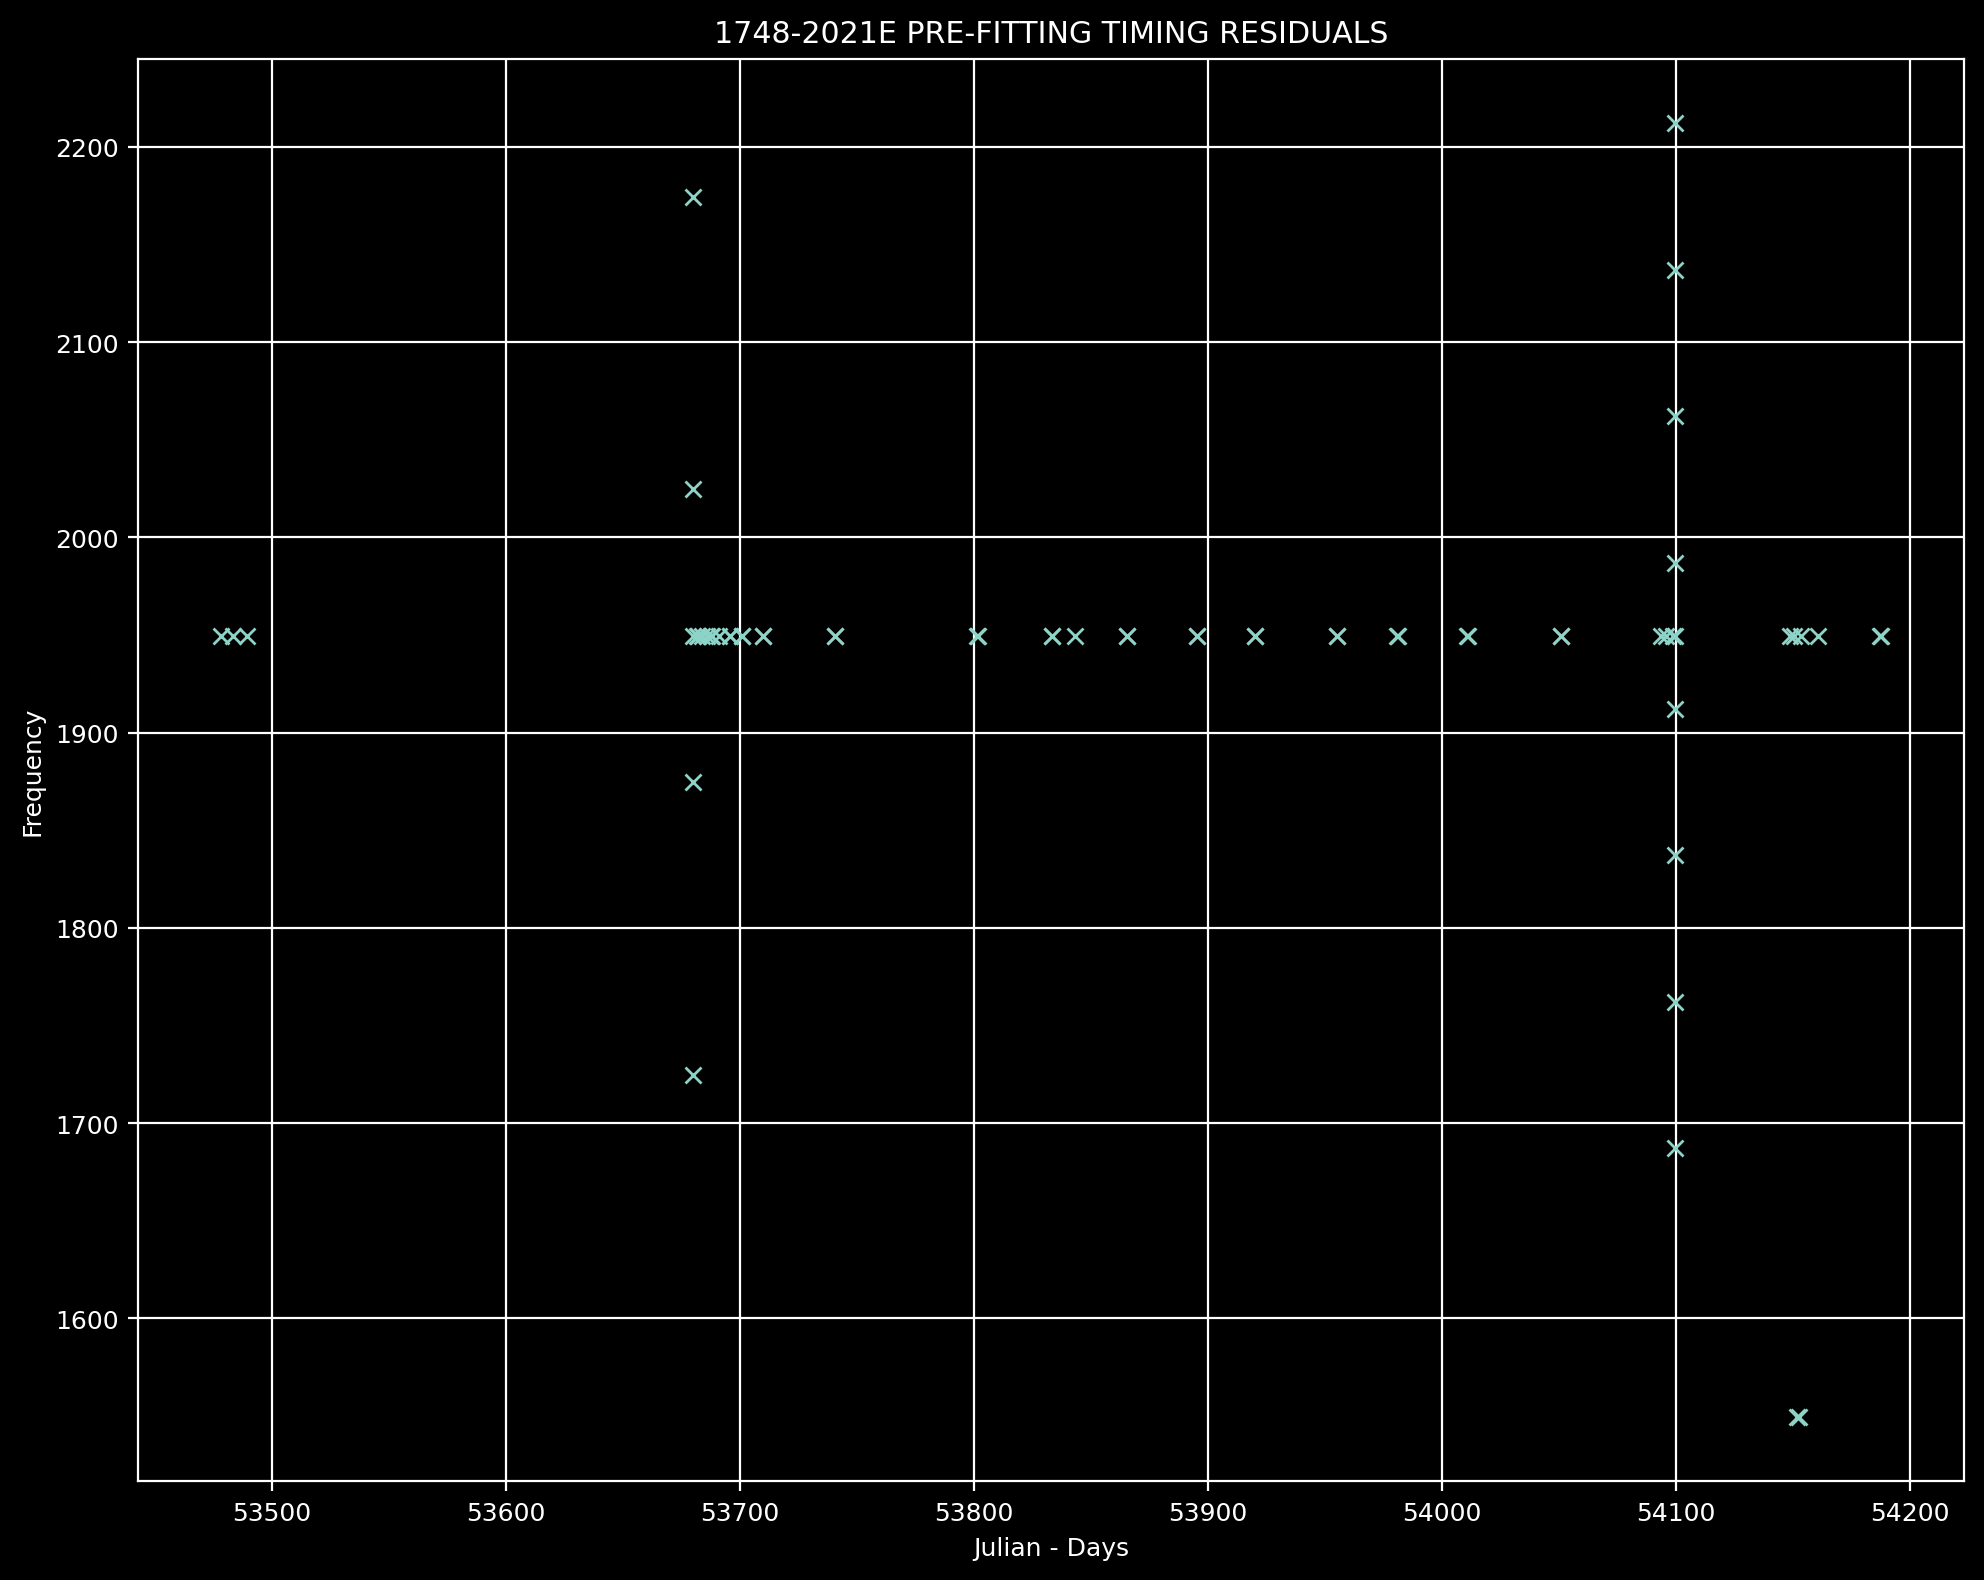

In [106]:
plt.figure()
plt.title(f"{pfile_.PSR.value} PRE-FITTING TIMING RESIDUALS")
plt.xlabel("Julian - Days")
plt.ylabel("Frequency")
plt.plot(mjds_,freq_,"x")
plt.tight_layout()
plt.grid()
plt.show()

# Getting Some Parameters

## Fittint - Auto

- A very common operation with PINT is fitting a timing model to timing data. Fundamentally this operation tries to adjust the model parameters to minimize the residuals produced when the model is applied to a set of `TOAs`.

In [87]:
fitting_ = pint.fitter.Fitter.auto(tf_error_correct,pfile_)
fitting_.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs without correlated errors and downhill fitter, returning 'DownhillWLSFitter'


In [89]:
print(f"Standard Deviation - RMS in PHASE is:\n{fitting_.resids.phase_resids.std()}")

Standard Deviation - RMS in PHASE is:
0.0011179200258477613


In [91]:
print(f"Standard Deviation - RMS in TIME is:\n{fitting_.resids.time_resids.std().to(astunit.us)}")

Standard Deviation - RMS in TIME is:
18.181855110332737 us


## Correlation Matrix - Display

In [92]:
correlation_ = fitting_.get_parameter_correlation_matrix(pretty_print=True)


Parameter correlation matrix:
         RAJ   DECJ    DM     F0     F1   
  RAJ    1.000
 DECJ   -0.047  1.000
  DM     0.139  0.054  1.000
  F0    -0.105  0.250 -0.099  1.000
  F1     0.277 -0.323  0.030 -0.773  1.000




## Summary

- `F0`: Spin frequency
- `F1`: Time derivative of spin frequency
- `F2`: Second order spin frequency derivative

> Please check for other attributes: [Data Attributes](https://nanograv-pint.readthedocs.io/en/latest/timingmodels.html)

In [93]:
fitting_.print_summary()

Fitted model using downhill_wls method with 5 free parameters to 44 TOAs
Prefit residuals Wrms = 1113.6432901099379 us, Postfit residuals Wrms = 18.175665163117117 us
Chisq = 39.396 for 38 d.o.f. for reduced Chisq of 1.037

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           1748-2021E 1748-2021E                   None
EPHEM                              DE421 DE421                        None
CLOCK                       TT(BIPM2019) TT(BIPM2019)                 None
UNITS                                TDB TDB                          None
START                                                         53478.3 d 
FINISH                                                        54187.6 d 
TIMEEPH                             FB90 FB90                         None
T2CMETHOD                       IAU2000B IAU2000B                     None
DILATEFREQ                  

# Save File

In [94]:
fitting_.model.write_parfile("/content/new_test_outputpar.par","wt")

In [98]:
print(f"AS PAR FILE:\n\n{fitting_.model.as_parfile()}")

AS PAR FILE:

# Created: 2023-07-21T11:31:27.364481
# PINT_version: 0.9.6
# User: root
# Host: 02df8e8e2250
# OS: Linux-5.15.109+-x86_64-with-glibc2.35
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2019)
UNITS                                 TDB
START              53478.2858714195382639
FINISH             54187.5873241702319097
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                   44
CHI2                                  0.0
RAJ                     17:48:52.80032123 1 0.00013868970124516537
DECJ                   -20:21:29.39582206 1 0.03403292479977475249
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                  61.4854